# Tree-Based Methods

### Loading Libraries

In [1]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

# StatsModels
from statsmodels.datasets import get_rdataset

# Scikit-Learn
import sklearn. model_selection as skm
from sklearn.metrics import (accuracy_score, log_loss)
from sklearn. ensemble import(RandomForestRegressor as RF, GradientBoostingRegressor as GBR)
from sklearn.tree import (DecisionTreeClassifier as DTC, DecisionTreeRegressor as DTR, plot_tree, export_text)

# ISLP
from ISLP.bart import BART
from ISLP.models import ModelSpec as MS
from ISLP import load_data, confusion_table

### Fitting Classification Trees

In [2]:
Carseats = load_data ('Carseats')

High = np.where(Carseats.Sales > 8,
                "Yes",
                "No")

In [3]:
model = MS(Carseats .columns.drop('Sales'), intercept =False)

D = model.fit_transform(Carseats)
feature_names = list(D.columns)
X = np.asarray(D)

In [4]:
clf = DTC(criterion='entropy',
          max_depth=3,
          random_state=0)

clf.fit(X, High)

,criterion,'entropy'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [5]:
accuracy_score(High, clf.predict(X))

0.79

In [6]:
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev

np.float64(0.4710647062649358)

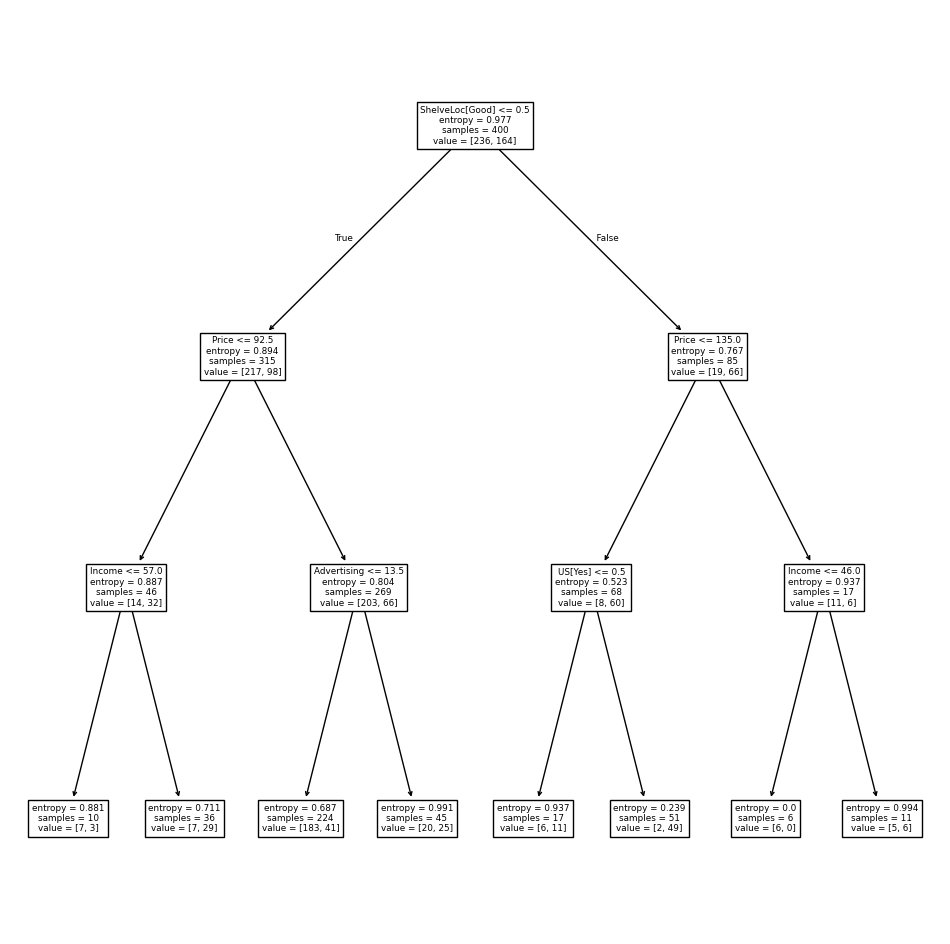

In [7]:
ax = subplots(figsize=(12 ,12))[1]

plot_tree (clf,
           feature_names =feature_names,
           ax=ax);

In [8]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [9]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)

results = skm.cross_validate(clf,
                             D,
                             High,
                             cv=validation)

results['test_score']

array([0.685])

In [10]:
(X_train,
 X_test,
 High_train,
 High_test)=skm.train_test_split(X,
                                 High,
                                 test_size=0.5,
                                 random_state=0)

In [11]:
clf = DTC(criterion ='entropy', random_state =0)
clf.fit(X_train, High_train)

accuracy_score(High_test, clf.predict(X_test))

0.735

In [12]:
ccp_path = clf.cost_complexity_pruning_path(X_train, High_train)

kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

In [13]:
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')

grid.fit(X_train, High_train)
grid.best_score_

np.float64(0.685)

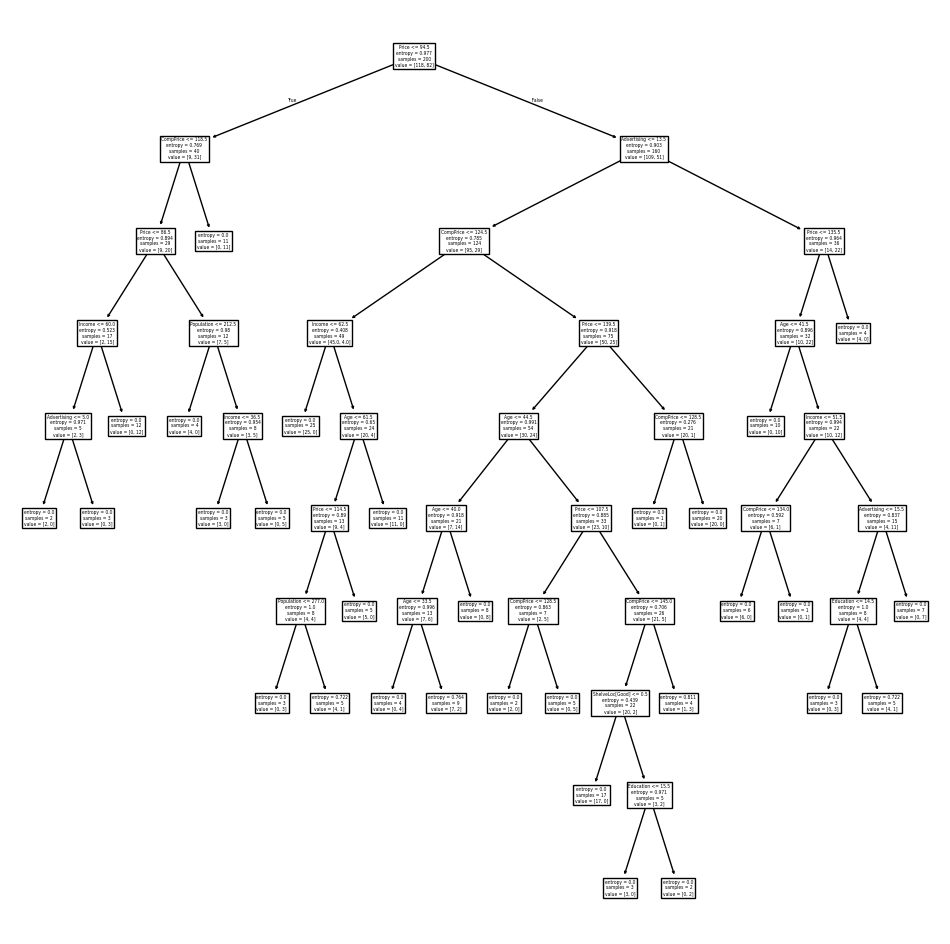

In [14]:
ax = subplots(figsize =(12, 12))[1]

best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

In [15]:
best_.tree_.n_leaves

np.int64(30)

In [16]:
print(accuracy_score(High_test,
                     best_.predict(X_test)))

confusion = confusion_table(best_.predict(X_test),
                            High_test)

confusion

0.72


Truth,No,Yes
Predicted,,
No,94,32
Yes,24,50
